<a href="https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Nine_point_throrem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nine point theorem

We initialize the library and construct midpoint subfigure to be used several times.

**If you get an error** due to missing libraries then install them as shown in the first section of [this notebook](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Euclidean_and_Lobachevsky_lines.ipynb).

In [0]:
from figure import *
from IPython.display import Image
show_asy_off()

We will investigate the construction in different metrics, thus we define in the clifford unit e which initially has Euclidean (elliptic) signature

In [0]:
mu=varidx(symbol("mu"),2)
e=clifford_unit(mu,diag_matrix([-1,-1]))

Then we create a figure F with this metric.

In [0]:
F=figure(e)

We explicitly define three points A, B, C by their coordinates

In [0]:
A=F.add_point([-numeric(10,10),numeric(0,1)],"A")
B=F.add_point([numeric(10,10),numeric(0,1)],"B")
C=F.add_point([-numeric(1,5),-numeric(3,2)],"C")

We add point N which represents infinity. Conformal versions of this theorem are produced if this point will be sent to a location in a finite region. 

In [0]:
N=F.add_cycle(cycle2D(0,[0,0],1,e),"N")

We produce three sides of the triangle ABC as cycles passing two vertices and infinity N.

In [0]:
a=F.add_cycle_rel([is_orthogonal(B),is_orthogonal(C),is_orthogonal(N)],"a")
b=F.add_cycle_rel([is_orthogonal(A),is_orthogonal(C),is_orthogonal(N)],"b")
c=F.add_cycle_rel([is_orthogonal(A),is_orthogonal(B),is_orthogonal(N)],"c")

To make drawing more colorful, sides will be painted in blue color.

In [0]:
F.set_asy_style(a,"rgb(0,0,.8)+1")
F.set_asy_style(b,"rgb(0,0,.8)+1")
F.set_asy_style(c,"rgb(0,0,.8)+1")

Now we drop altitudes $h_a$, $h_b$ and $h_c$ to opposite sides, they are not so important and are presented by dashed lines.

In [0]:
ha=F.add_cycle_rel([is_orthogonal(A),is_orthogonal(N),is_orthogonal(a)],"h_a")
F.set_asy_style(ha,"dashed")
hb=F.add_cycle_rel([is_orthogonal(B),is_orthogonal(N),is_orthogonal(b)],"h_b")
F.set_asy_style(hb,"dashed")
hc=F.add_cycle_rel([is_orthogonal(C),is_orthogonal(N),is_orthogonal(c)],"h_c")
F.set_asy_style(hc,"dashed")

Feets $A_h$, $A_b$ and $A_c$ of altitudes are points and shall be defined through self-othogonality. Thus we need to prepare respective symbols in advance.

In [0]:
A1=symbol("A_h")
B1=symbol("B_h")
C1=symbol("C_h")
F.add_cycle_rel([is_orthogonal(a),is_orthogonal(ha),is_orthogonal(A1),is_adifferent(N)],A1)
F.add_cycle_rel([is_orthogonal(b),is_orthogonal(hb),is_adifferent(N),is_orthogonal(B1)],B1)
F.add_cycle_rel([is_adifferent(N),is_orthogonal(c),is_orthogonal(hc),is_orthogonal(C1)],C1)

The nine-point circe $p$ is completely defined by three feets of altitudes. It is painted in red.

In [0]:
p=F.add_cycle_rel([is_orthogonal(A1),is_orthogonal(B1),is_orthogonal(C1)],"p")
F.set_asy_style(p,"rgb(0,.8,0)+1")

To build midpoints $A_m$, $B_m$ and $C_m$ of sideds we use pre-defined construction as subfigure.

In [0]:
SF=midpoint_constructor()
A2=F.add_subfigure(SF,[B,C,N],"A_m")
B2=F.add_subfigure(SF,[C,A,N],"B_m")
C2=F.add_subfigure(SF,[A,B,N],"C_m")

We construct the intersection of alltitudes $H$ and midpoints $A_d$, $B_d$ and $C_d$ of intervals $HA$, $HB$ and $HC$ respectively.

In [0]:
H=symbol("H")
F.add_cycle_rel([is_orthogonal(ha),is_orthogonal(hb),is_orthogonal(H),is_adifferent(N)],H)
A3=F.add_subfigure(SF,[H,A,N],"A_d")
B3=F.add_subfigure(SF,[B,H,N],"B_d")
C3=F.add_subfigure(SF,[C,H,N],"C_d")

 Now we can check that the nine-point circle $p$ passes other six points $A_m$, $B_m$, $C_m$  $A_d$, $B_d$, $C_d$. We will do this several times, thus a procedure is defined.

In [0]:
def check_theorem():
    for j in [A1, B1, C1, A2, B2, C2]:
        res = F.check_rel(p,j,"orthogonal")
        for i in range(len(res)):
            print ("Nine-point circle passes %s: %s" % (j, bool(res[i])) )

check_theorem()

Nine-point circle passes A_h: True
Nine-point circle passes B_h: True
Nine-point circle passes C_h: True
Nine-point circle passes A_m: True
Nine-point circle passes B_m: True
Nine-point circle passes C_m: True


We may also visualise our construction

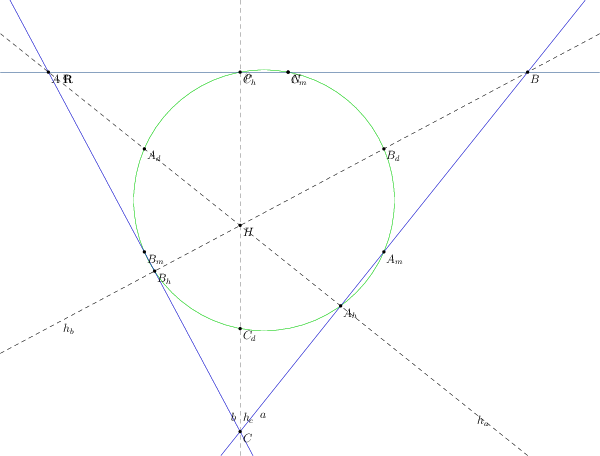

In [0]:
F.asy_write(600,-1.2,1.3,-1.6,0.3,"nine-points-ell", "png")
Image("nine-points-ell.png")

So far it was the classical results on nine-point theorem. Now we can produce a new conformal version. It is achived by moving the point N to a finitl position. All streight lines will be deformed into the circles passing point N. We again check the theorem and produce an illustration.

Nine-point circle passes A_h: True
Nine-point circle passes B_h: True
Nine-point circle passes C_h: True
Nine-point circle passes A_m: True
Nine-point circle passes B_m: True
Nine-point circle passes C_m: True


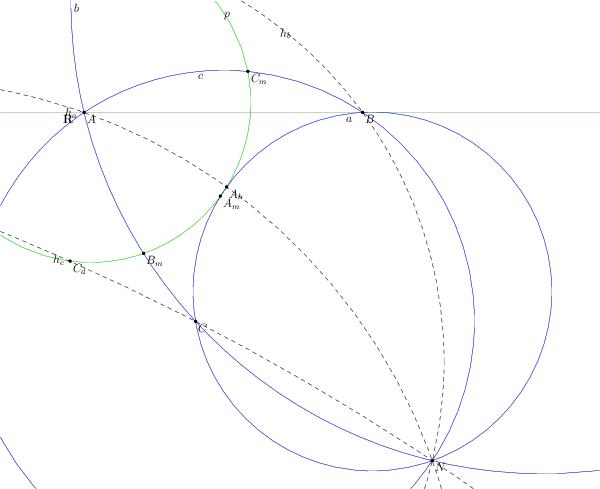

In [0]:
#IN=cycle2D(0,[0,0],1)
F.move_point(N, [1.5,-2.5])
check_theorem()
F.asy_write(600,-1.6,2.7,-2.7,0.8,"nine-points-ell1", "png")
Image("nine-points-ell1.png")

Another unique feature of the MoebInv library is ability to work additinally in hyperbolic and parabolic metrics. We present the nine point theorem in hyperbolic case. To this end we simply change metric of the figure, return the point N to infinity and then check the theorme and make the illustration.

Nine-point circle passes A_h: True
Nine-point circle passes B_h: True
Nine-point circle passes C_h: True
Nine-point circle passes A_m: True
Nine-point circle passes B_m: True
Nine-point circle passes C_m: True


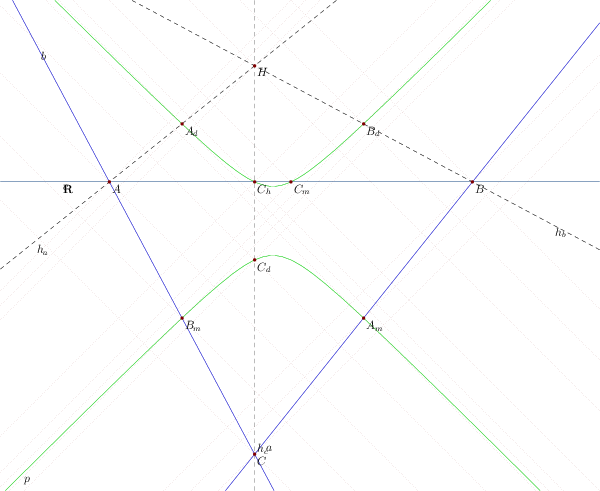

In [0]:
F.move_cycle(N, cycle2D(0,[0,0],1))
F.set_metric(diag_matrix([-1,1]))
check_theorem()
F.asy_write(600,-1.6,1.7,-1.7,1,"nine-points-hyp", "png")
Image("nine-points-hyp.png")

## Further info:
* [MoebInv library full documentation](https://sourceforge.net/projects/moebinv/files/docs/figure.pdf)
* [MoebInv Home page](http://moebinv.sourceforge.net/)
* [MoebInv CoLab Notebooks](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Table%20of%20contents.ipynb)
* [MoebInv CodeOcean capsule](https://codeocean.com/capsule/7952650/tree)